In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 1 From distances to embeddings

## (ii) Write a program in your preferred language to find an optimal setting of locations x1,...,x9.You must submit your code to receive full credit.

In [2]:
cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
n = 9
D = np.array([ [0,206,429, 1504, 963,2976, 3095, 2979, 1949],
             [206, 0,233,1308,802,2815,2934, 2786, 1771],
             [429 ,233,0 ,1075 ,671, 2684, 2799,2631, 1616],
             [1504,1308,1075,0,1329,3273 ,3053, 2687,2037],
             [963,802,671,1329,0,2013, 2142, 2054, 996],
             [2976,2815,2684,3273,2013,0, 808, 1131, 1307],
             [3095,2934,2799,3053,2142,808,0,379,1235],
             [2979,2786 ,2631,2687,2054,1131 ,379, 0 ,1059],
             [1949,1771,1616,2037,996,1307, 1235, 1059, 0] ])

### derivative of discrepancy function with respect to a location xi = $2\sum_{j\neq i}\left(\left||\boldsymbol{x}_i-\boldsymbol{x}_j\right||-D_{ij}\right)\frac{(x_i-x_j)}{||x_i-x_j||}$

In [3]:
def gradient(locs, D, i):
    xi = locs[i]
    g = 0.0
    for j in range(len(locs)):
        if j!=i:
            xj = locs[j]
            n = np.linalg.norm(xi-xj)
            g += (n-D[i,j])*(xi-xj)/n
    return 2*g 

In [4]:
locs = np.random.randn(n, 2)
alpha = 0.0001
tolerance = 1e-6
max_itr = 100000
while max_itr > 0:
    for i in range(len(locs)):
        new = locs[i] - alpha * gradient(locs, D, i)
        if np.linalg.norm(locs[i]-new)<tolerance:
            break
        locs[i] = new 
    max_itr -=1
locs

array([[  304.0752243 , -1395.34011642],
       [  162.95844468, -1234.68370562],
       [  -27.96848098, -1090.11819642],
       [-1134.35872533, -1085.96825769],
       [   81.31339917,  -445.99606385],
       [  837.50073515,  1492.63894312],
       [   51.14507479,  1710.33810408],
       [ -300.86966004,  1523.93460986],
       [   27.37462665,   523.36334272]])

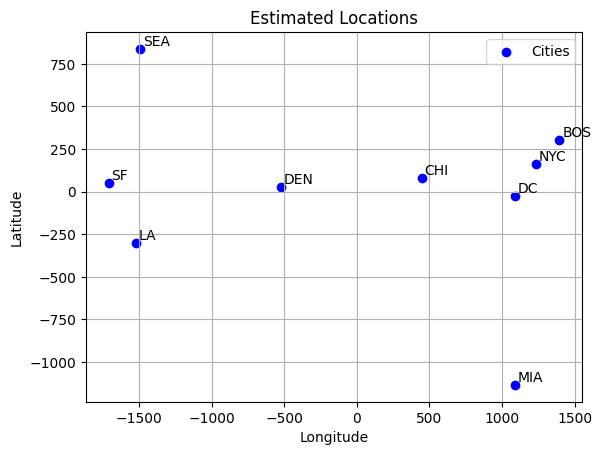

In [10]:
plt.scatter(-locs[:, 1], locs[:, 0], c='blue', marker='o', label='Cities')
for i, txt in enumerate(cities):
    plt.annotate(txt, (-locs[i, 1] + 20, locs[i, 0] + 20))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Estimated Locations')
plt.legend()
plt.grid()
plt.show()

## (iii) 
### After multiple run, I found most of the time I need to rotated the graph either horizontally or vertically to fit the north, south, east, and west direction. After rotation, most of the cities make sense in real life. The graph I append here is the best result I've got. Western cities are located in the west and eastern cities are located on the east. However, Chicago sometimes is located lower than DC which is not correct. This problem might be because we only have the relative distance between cities which might have more than one possible answer, and also the altitude and longitude we get here is just relative values on map. I only rotate the graphs by 90 degree, so the outlier cases might need to rotate the graph with certain angle to look better. Also, the earth is round, so what is shown on a common map and our flat latitude and longitude graph might look different. 